# Installing Python Modules

In [1]:
pip install np_utils

     |████████████████████████████████| 61 kB 7.7 MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57131 sha256=a498fccf1b387b0b7764a5cd067bbefe596dab72db0ceeff18417e04d107839b
  Stored in directory: /root/.cache/pip/wheels/8c/4e/ef/095c24693723c329f4cdc1079861cdbb2487d4b41b2496a4e7
Successfully built np-utils


In [2]:
pip install snips

  Created wheel for snips: filename=snips-1.0.0-py3-none-any.whl size=2358 sha256=508474402eddfeb68d410c22c23495007d1a7fa20df0bd83cf8276bd36e53fef
  Stored in directory: /root/.cache/pip/wheels/d2/99/76/e9b89daf5e273acb9f90c26220b5802594984bb35159a602e1
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=275bc2e0b275c225905e2580193049a7e36f9842e0bc8232b054d8b7f617deca
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built snips pyperclip


In [3]:

# essential tools
import pandas as pd
import numpy as np
import io
import os
import sys
import pickle
from datetime import datetime
import time
import copy
import random

import cv2

# Stats
from scipy import stats
from scipy.stats import skew, norm, kurtosis
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, balanced_accuracy_score, log_loss
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import homogeneity_score, confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, LeakyReLU, concatenate, Convolution1D
from tensorflow.keras.optimizers import RMSprop,Nadam,Adadelta, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.python.keras import regularizers
import snips as snp

import keras
from keras.layers import Convolution2D, Input, merge
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l2
from keras.layers.advanced_activations import PReLU
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator, NumpyArrayIterator, array_to_img
from keras.models import Model
from keras.preprocessing import image
from keras.utils import np_utils
from PIL import Image
from sklearn.neural_network import MLPClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets

import seaborn as sns
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib 
#snp.prettyplot(matplotlib)  # my aesthetic preferences for plotting
%matplotlib inline

# allow muliple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# display more rows and columns
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows = 999
display.max_seq_items = None

from IPython.display import display
pd.set_option('display.max_columns', None)

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

np.set_printoptions(threshold=np.inf)

In [4]:
from google.colab import drive
from pathlib import Path
main_path = '/content/drive/MyDrive/leaf_classification/'
# change working directory
#print(os.chdir(main_path))
# get current directory
print(os.getcwd())
os.listdir()


/content


['.config', 'drive', 'sample_data']

# Loading Data

In [5]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [6]:
target_size = (256, 256)
grayscale = True
def load_image(id):
    img_path = main_path+'/images/%d.jpg' % (id, )
    img = image.load_img(img_path,
                         grayscale=grayscale)
    img.thumbnail(target_size)
    bg = Image.new('L', target_size, (0,))
    bg.paste(
        img, (int((target_size[0] - img.size[0]) / 2), int((target_size[1] - img.size[1]) / 2))
    )
    img_arr = image.img_to_array(bg)
    
    return img_arr

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


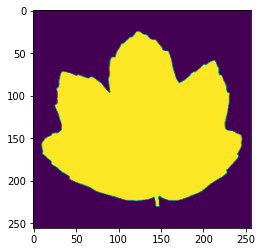

Shape of images (256, 256, 1)
Number of features 192


LabelEncoder()

Number of classes 99
Number of instances 990


(array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10.]),
 array([ 0.        ,  0.98989899,  1.97979798,  2.96969697,  3.95959596,
         4.94949495,  5.93939394,  6.92929293,  7.91919192,  8.90909091,
         9.8989899 , 10.88888889, 11.87878788, 12.86868687, 13.85858586,
        14.84848485, 15.83838384, 16.82828283, 17.81818182, 18.80808081,
        19.7979798 , 20.78787879, 21.77777778, 22.76767677, 23.75757576,
        24.74747475, 25.73737374, 26.72727273, 27.71717172, 28.70707071,
 

Text(0.5, 1.0, 'Number of instances in each class')

Text(0.5, 0, 'Class id')

Text(0, 0.5, 'Number of instances')

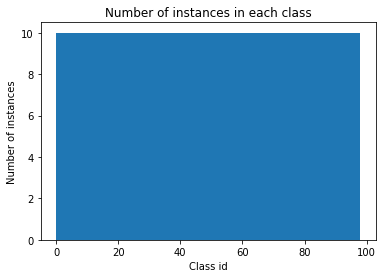

In [7]:
# Load training data
train_data = pd.read_csv((main_path+'/train.csv'))
# load the ids in the training data set
x_ids = train_data.iloc[:, 0]
x_images = list()
for i in x_ids:
    x_images.append(load_image(i))
x_images = np.array(x_images)
plt.imshow(x_images[0].squeeze())
plt.show()
print('Shape of images', x_images[0].shape)
# Ignore the first column (id) and the second column (species)
x_features = train_data.iloc[:, 2:] #.values
print('Number of features', x_features.shape[1])

# Convert the species to category type
y = train_data['species']
# Get the corresponding categories list for species
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

nb_classes = len(le.classes_)
print('Number of classes', nb_classes)
print('Number of instances', len(y))

plt.hist(y, bins=nb_classes)
plt.title('Number of instances in each class')
plt.xlabel('Class id')
plt.ylabel('Number of instances')
plt.show()

# convert a class vectors (integers) to a binary class matrix
y = np_utils.to_categorical(y)

# Load testing data
test_data = pd.read_csv(main_path+'/test.csv')
test_ids = test_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:] 
test_images = list()
for i in test_ids:
    test_images.append(load_image(i))
test_images = np.array(test_images)

# Load submission file
submission_data = pd.read_csv(main_path+'/sample_submission.csv')

# EDA

In [ ]:
y[10]
x_features.head()
test_ids.head()
test_data.head()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,0.037109,0.019531,0.000000,0.009766,0.021484,0.015625,0.007812,0.013672,0.027344,0.062500,0.000000,0.017578,0.031250,0.0,0.044922,0.007812,0.025391,0.003906,0.013672,0.015625,0.013672,0.003906,0.005859,0.003906,0.019531,0.001953,0.000647,0.000609,0.000576,0.000553,0.000516,0.000496,0.000474,0.000453,0.000454,0.000429,0.000418,0.000410,0.000406,0.000398,0.000399,0.000389,0.000399,0.000416,0.000414,0.000430,0.000422,0.000437,0.000452,0.000467,0.000470,0.000484,0.000489,0.000490,0.000475,0.000486,0.000484,0.000500,0.000513,0.000511,0.000519,0.000513,0.000502,0.000498,0.000487,0.000471,0.000458,0.000440,0.000436,0.000427,0.000394,0.000385,0.000382,0.000370,0.000367,0.000373,0.000386,0.000389,0.000391,0.000414,0.000422,0.000434,0.000452,0.000471,0.000485,0.000512,0.000536,0.000553,0.000610,0.000661,0.049805,0.017578,0.003906,0.024414,0.001953,0.010742,0.035156,0.007812,0.039062,0.062500,0.000000,0.000000,0.007812,0.007812,0.0,0.0,0.047852,0.0,0.054688,0.022461,0.0,0.000977,0.018555,0.001953,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.000000,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.0,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,0.033203,0.019531,0.031250,0.009766,0.007812,0.031250,0.001953,0.039062,0.029297,0.031250,0.035156,0.000000,0.007812,0.0,0.046875,0.046875,0.029297,0.009766,0.017578,0.007812,0.013672,0.019531,0.000000,0.000000,0.003906,0.000000,0.000749,0.000695,0.000720,0.000709,0.000688,0.000660,0.000624,0.00058

0     4
1     7
2     9
3    12
4    13
Name: id, dtype: int64

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,0.023438,0.005859,0.021484,0.076172,0.001953,0.035156,0.000000,0.001953,0.021484,0.001953,0.015625,0.009766,0.000000,0.000000,0.005859,0.007812,0.015625,0.000000,0.017578,0.029297,0.021484,0.001953,0.003906,0.025391,0.000000,0.013672,0.005859,0.042969,0.064453,0.031250,0.005859,0.003906,0.001953,0.021484,0.025391,0.005859,0.001953,0.023438,0.068359,0.000000,0.011719,0.031250,0.001953,0.011719,0.003906,0.007812,0.000000,0.009766,0.003906,0.054688,0.000000,0.000000,0.000000,0.052734,0.000000,0.000782,0.000828,0.000876,0.000927,0.000993,0.001060,0.001123,0.001205,0.001295,0.001393,0.001496,0.001601,0.001679,0.001590,0.001492,0.001398,0.001314,0.001238,0.001186,0.001125,0.001070,0.001005,0.000943,0.000886,0.000826,0.000783,0.000741,0.000702,0.000671,0.000668,0.000682,0.000705,0.000736,0.000763,0.000805,0.000861,0.000918,0.000979,0.001054,0.001132,0.001212,0.001279,0.001364,0.001420,0.001435,0.001436,0.001418,0.001359,0.001284,0.001206,0.001134,0.001055,0.001003,0.000941,0.000879,0.000819,0.000762,0.000717,0.000698,0.000688,0.000680,0.000695,0.000719,0.000737,0.112310,0.013672,0.011719,0.004883,0.010742,0.022461,0.055664,0.028320,0.040039,0.008789,0.006836,0.00000,0.008789,0.008789,0.000000,0.0,0.017578,0.000977,0.025391,0.023438,0.0,0.000977,0.023438,0.000000,0.004883,0.000000,0.013672,0.001953,0.045898,0.024414,0.045898,0.000000,0.000000,0.070312,0.011719,0.000000,0.000000,0.054688,0.024414,0.026367,0.000000,0.000977,0.010742,0.020508,0.013672,0.034180,0.025391,0.000000,0.014648,0.018555,0.000000,0.000000,0.000000,0.015625,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,0.023438,0.009766,0.019531,0.039062,0.027344,0.017578,0.000000,0.017578,0.015625,0.009766,0.009766,0.042969,0.007812,0.000000,0.003906,0.005859,0.011719,0.007812,0.009766,0.037109,0.013672,0.005859,0.003906,0.019531,0.000000,0.005859,0.029297,0.019531,0.041016,0.005859,0.003906,0.001953,0.009766,0.031250,0.001953,0.029297,0.007812,0.037109,0.009766,0.001953,0.058594,0.029297,0.001953,0.021484,0.003906,0.005859,0.000000,0.021484,0.015625,0.048828,0.000000,0.000000,0.007812,0.029297,0.013672,0.000534,0.000

In [ ]:
train_data['species'].value_counts()
train_data['species'].unique()

Sorbus_Aria                     10
Acer_Mono                       10
Quercus_Phellos                 10
Quercus_Afares                  10
Quercus_Semecarpifolia          10
Betula_Pendula                  10
Quercus_Rubra                   10
Alnus_Sieboldiana               10
Populus_Nigra                   10
Quercus_Ilex                    10
Ulmus_Bergmanniana              10
Quercus_Pubescens               10
Quercus_Agrifolia               10
Viburnum_x_Rhytidophylloides    10
Quercus_Imbricaria              10
Tilia_Oliveri                   10
Liquidambar_Styraciflua         10
Quercus_Coccifera               10
Lithocarpus_Cleistocarpus       10
Quercus_Dolicholepis            10
Callicarpa_Bodinieri            10
Acer_Palmatum                   10
Zelkova_Serrata                 10
Prunus_X_Shmittii               10
Eucalyptus_Glaucescens          10
Tilia_Tomentosa                 10
Eucalyptus_Neglecta             10
Quercus_Hartwissiana            10
Quercus_Phillyraeoid

array(['Acer_Opalus', 'Pterocarya_Stenoptera', 'Quercus_Hartwissiana',
       'Tilia_Tomentosa', 'Quercus_Variabilis', 'Magnolia_Salicifolia',
       'Quercus_Canariensis', 'Quercus_Rubra', 'Quercus_Brantii',
       'Salix_Fragilis', 'Zelkova_Serrata', 'Betula_Austrosinensis',
       'Quercus_Pontica', 'Quercus_Afares', 'Quercus_Coccifera',
       'Fagus_Sylvatica', 'Phildelphus', 'Acer_Palmatum',
       'Quercus_Pubescens', 'Populus_Adenopoda', 'Quercus_Trojana',
       'Alnus_Sieboldiana', 'Quercus_Ilex', 'Arundinaria_Simonii',
       'Acer_Platanoids', 'Quercus_Phillyraeoides', 'Cornus_Chinensis',
       'Liriodendron_Tulipifera', 'Cytisus_Battandieri',
       'Rhododendron_x_Russellianum', 'Alnus_Rubra',
       'Eucalyptus_Glaucescens', 'Cercis_Siliquastrum',
       'Cotinus_Coggygria', 'Celtis_Koraiensis', 'Quercus_Crassifolia',
       'Quercus_Kewensis', 'Cornus_Controversa', 'Quercus_Pyrenaica',
       'Callicarpa_Bodinieri', 'Quercus_Alnifolia', 'Acer_Saccharinum',
       'Prun

In [ ]:
def generate_stats(df):

    df_stats = pd.DataFrame()

    x = df 
    for column in x.columns:
        n = len(x)
        outliers = (n - len(x[np.abs(stats.zscore(x[column]) <3)]))/n
        mean = np.mean(x[column])
        std = np.std(x[column])
        mn = np.min(x[column])
        mx = np.max(x[column])
        pct25 = np.percentile(x[column], 25)
        pct50 = np.percentile(x[column], 50)
        pct75 = np.percentile(x[column], 75)
        
        iqr =  pct75 - pct25
        exn = sum(x[column] < pct25 - (3 * iqr))
        exp = sum(x[column] > pct75 + (3 * iqr))
        ex = exp + exn
        
        zeros = len(x[x[column] == 0])/n
        unique = len(np.unique(x[column]))
        kurt = kurtosis(x[column])
        skewness = skew(x[column])
        df_stats = df_stats.append(pd.DataFrame([[column,n, outliers, ex, mean, std, mn, mx,pct25, pct50, pct75,  iqr, zeros, unique,kurt, skewness]]), ignore_index = False)
        
    df_stats.columns = ['column', 'items', 'out', 'ex', 'mean', 'std','min','max','pct25', 'pct50','pct75','iqr', 'zeros', 'unique','kurtosis','skew']
    df_stats.set_index(keys = ['column'], drop = True, inplace = True)
    
    return df_stats

In [ ]:
generate_stats(x_features)

,items,out,ex,mean,std,min,max,pct25,pct50,pct75,iqr,zeros,unique,kurtosis,skew
column,,,,,,,,,,,,,,,
margin1,990,0.011111,0,0.017412,0.019729,0.000000,0.087891,0.001953,0.009766,0.025391,0.023438,0.205051,46,0.931532,1.307576
margin2,990,0.020202,10,0.028539,0.038835,0.000000,0.205080,0.001953,0.011719,0.041016,0.039063,0.209091,85,2.566238,1.751620
margin3,990,0.015152,1,0.031988,0.025834,0.000000,0.156250,0.013672,0.025391,0.044922,0.031250,0.023232,66,1.863983,1.365453
margin4,990,0.030303,37,0.023280,0.028397,0.000000,0.169920,0.005859,0.013672,0.029297,0.023438,0.062626,71,7.088168,2.485502
margin5,990,0.029293,31,0.014264,0.018380,0.000000,0.111330,0.001953,0.007812,0.017578,0.015625,0.205051,51,5.218778,2.158032
margin6,990,0.016162,7,0.038579,0.052003,0.000000,0.310550,0.000000,0.015625,0.056153,0.056153,0.266667,107,3.012208,1.756469
margin7,990,0.013131,0,0.019202,0.017502,0.000000,0.091797,0.005859,0.015625,0.029297,0.023438,0.128283,45,1.248630,1.186679
margin8,990,0.008081,185,0.001083,0.002741,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.813131,9,33.424760,4.419461
margin9,990,0.030303,50,0.007167,0.008928,0.000000,0.076172,0.001953,0.005859,0.007812,0.005859,0.238384,30,12.076900,3.020225


In [ ]:
generate_stats(test_data)

,items,out,ex,mean,std,min,max,pct25,pct50,pct75,iqr,zeros,unique,kurtosis,skew
column,,,,,,,,,,,,,,,
id,594,0.000000,0,780.673401,465.254853,4.000000,1583.000000,368.500000,774.000000,1184.500000,816.000000,0.000000,594,-1.265328,0.007439
margin1,594,0.003367,0,0.017562,0.019568,0.000000,0.085938,0.001953,0.009766,0.028809,0.026856,0.207071,42,0.607917,1.226824
margin2,594,0.018519,3,0.028425,0.038318,0.000000,0.189450,0.001953,0.010743,0.041016,0.039063,0.222222,77,2.287542,1.691597
margin3,594,0.011785,3,0.031858,0.025697,0.000000,0.167970,0.013672,0.023438,0.042969,0.029297,0.020202,59,2.703685,1.469317
margin4,594,0.030303,27,0.022556,0.028773,0.000000,0.164060,0.005859,0.013672,0.027344,0.021485,0.087542,63,6.791429,2.490350
margin5,594,0.020202,11,0.014527,0.018014,0.000000,0.093750,0.001953,0.007812,0.019531,0.017578,0.190236,45,3.294403,1.836918
margin6,594,0.018519,5,0.037497,0.051329,0.000000,0.271480,0.000000,0.013672,0.056641,0.056641,0.272727,94,3.086583,1.781598
margin7,594,0.013468,0,0.019222,0.017108,0.000000,0.087891,0.005859,0.015625,0.029297,0.023438,0.132997,40,1.126317,1.097821
margin8,594,0.010101,109,0.001085,0.002695,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.816498,9,17.779076,3.530899


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

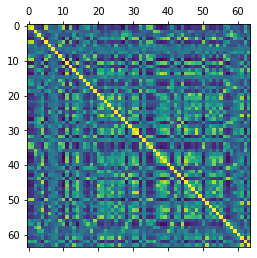

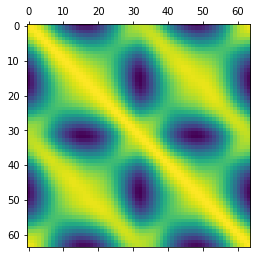

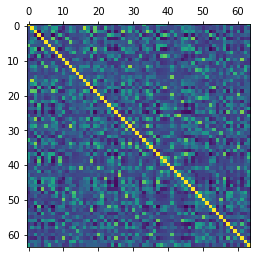

In [ ]:
plt.figure(figsize=(10,10))
plt.matshow(x_features[x_features.columns[x_features.columns.to_series().str.contains('margin')]].corr())
plt.matshow(x_features[x_features.columns[x_features.columns.to_series().str.contains('shape')]].corr())
plt.matshow(x_features[x_features.columns[x_features.columns.to_series().str.contains('texture')]].corr())
plt.show()

Figure 1.1: Correlation of features 

In [ ]:
def setBoxplot(ax,ylim):
    ax.set_ylim(ylim);
    ax.tick_params(axis='y',labelsize=10);
    ax.tick_params(axis='x',labelsize=10);
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=7);

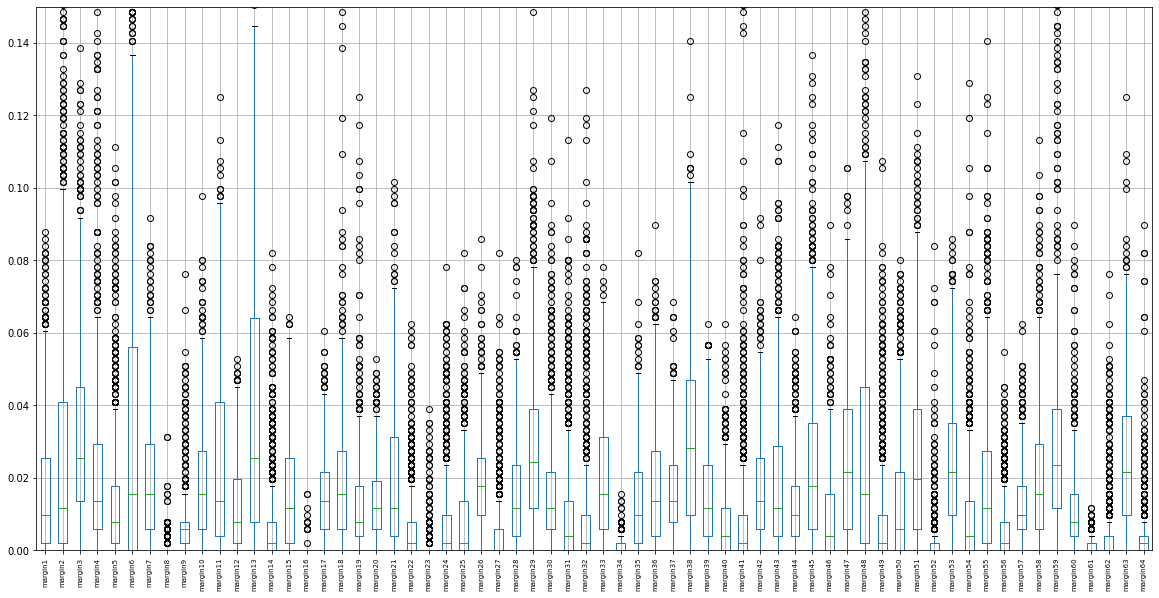

In [ ]:
fig = plt.figure(figsize = (20,10));
ax = fig.add_subplot(1,1,1);
x_features[x_features.columns[x_features.columns.to_series().str.contains('margin')]].boxplot(whis=1.5);
setBoxplot(ax,[0,0.15])

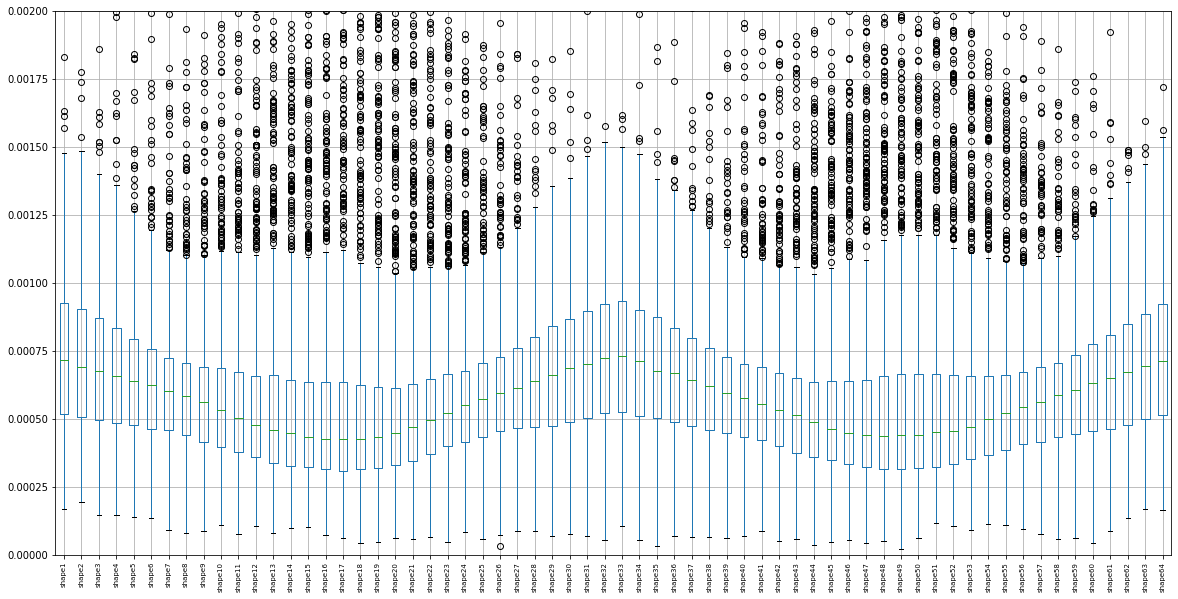

In [ ]:
fig = plt.figure(figsize = (20,10));
ax = fig.add_subplot(1,1,1);
x_features[x_features.columns[x_features.columns.to_series().str.contains('shape')]].boxplot(whis=1.5);
setBoxplot(ax,[0,0.002])

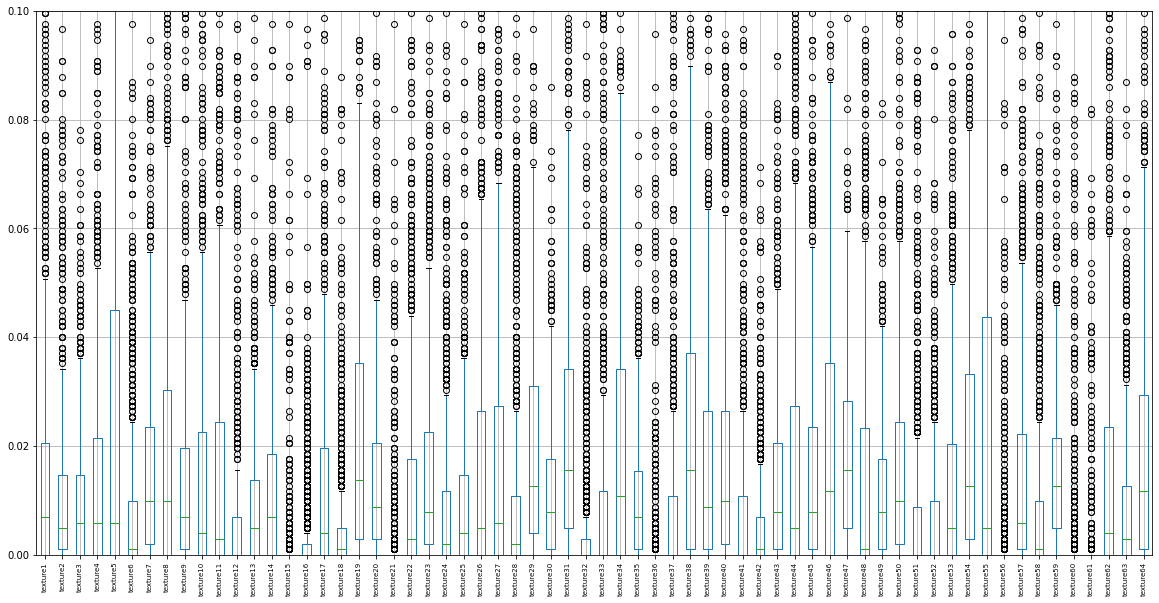

In [ ]:
fig = plt.figure(figsize = (20,10));
ax = fig.add_subplot(1,1,1);
x_features[x_features.columns[x_features.columns.to_series().str.contains('texture')]].boxplot(whis=1.5);
setBoxplot(ax,[0,0.1])

Figure 1.2: Boxplot of Features


 Acer_Opalus


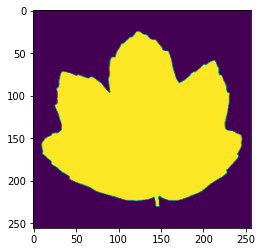


 Pterocarya_Stenoptera


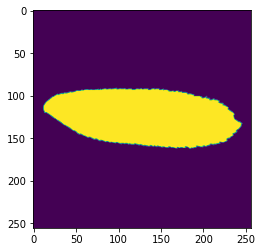


 Quercus_Hartwissiana


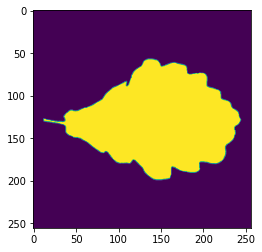


 Tilia_Tomentosa


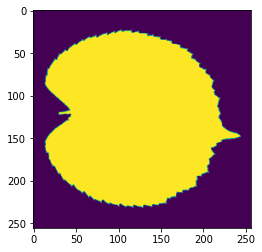


 Quercus_Variabilis


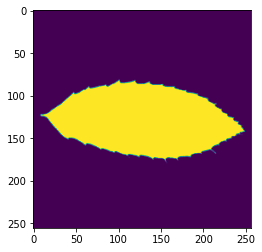


 Magnolia_Salicifolia


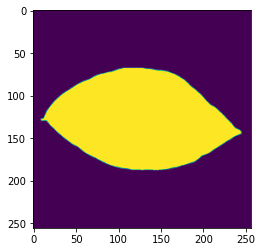


 Quercus_Canariensis


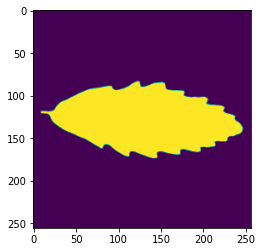


 Quercus_Rubra


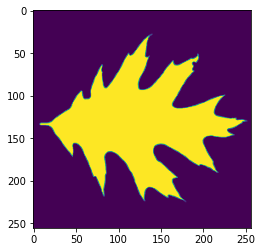


 Quercus_Brantii


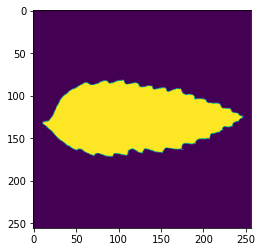


 Salix_Fragilis


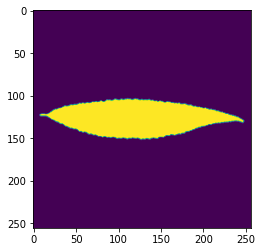

In [ ]:
for i in range(10):
  plt.imshow(x_images[i].squeeze())
  print('\n',train_data['species'][i])
  plt.show()


Figure 1.3: Image-based leaf

# Normalization

In [8]:
scaler = MinMaxScaler()
x_features = pd.DataFrame(scaler.fit_transform(x_features),columns=x_features.columns,dtype='float64')
x_test = pd.DataFrame(scaler.fit_transform(x_test),columns=x_test.columns,dtype='float64')

Figure 2: Min-max normalization

# Cross-validation Design

In [9]:
# The folds are made by preserving the percentage of samples for each class
sss = StratifiedShuffleSplit(10, 0.2, random_state=321)
x_features = x_features.values
x_test = x_test.values
for train_index, validation_index in sss.split(x_images, y):
	x_train_images, x_validation_images, x_train_features, x_validation_features = x_images[train_index], x_images[validation_index], x_features[train_index], x_features[validation_index]
	y_train, y_validation = y[train_index], y[validation_index]
    
print('Shape of x train images', x_train_images.shape)
print('Shape of x train features', x_train_features.shape)
print('Shape of y train', y_train.shape)
print('Shape of x validation images', x_validation_images.shape)
print('Shape of x validation features', x_validation_features.shape)
print('Shape of y validation', y_validation.shape)


Shape of x train images (792, 256, 256, 1)
Shape of x train features (792, 192)
Shape of y train (792, 99)
Shape of x validation images (198, 256, 256, 1)
Shape of x validation features (198, 192)
Shape of y validation (198, 99)


Figure 3: cross-validation 80/20

# Model Performance Modules

In [12]:

def model_performance(model, x_train, x_test, y_test):
    predictions = model.predict(x_test)  # same as predict_proba in softmax output
    y_pred = np.argmax(np.round(predictions), axis=1)
    y_test_og = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test_og, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test_og, y_pred)
    # auc = roc_auc_score(y_test_og, predictions)  # need 1-vs-all approach for auc-roc curve
    loss = log_loss(y_test_og, predictions)
    report = classification_report(y_test_og, y_pred)
    matrix = confusion_matrix(y_test_og, y_pred)

    tp = sum(np.diagonal(matrix))
    fp = np.sum(matrix, axis=0) - tp
    tn = 0  # must be computed per class
    fn = np.sum(matrix, axis=1) - tp

    print(f'training cases={x_train.shape[0]}, validation cases={y_test.shape[0]}, possible outcomes={y_test.shape[1]}')
    print(f'accuracy={accuracy:.2f}%, balanced_accuracy={balanced_accuracy:.2f}%, loss={loss:.3f}')
    # print(f'auc={auc:.3f}')
    print(report)

def plot_model_history(metric):
    plt.figure()
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'valiation'], loc='upper left')
    plt.show()

def plot_model_results():
    ## we need to consider the loss for final submission to leaderboard
    ## print(history.history.keys())
    print('val_acc: ',max(history.history['val_accuracy']))
    print('val_loss: ',min(history.history['val_loss']))
    print('train_acc: ',max(history.history['accuracy']))
    print('train_loss: ',min(history.history['loss']))

    print()
    print("train/val loss ratio: ", min(history.history['loss'])/min(history.history['val_loss']))


    ## summarize history for loss
    ## Plotting the loss with the number of iterations
    plt.semilogy(history.history['loss'])
    plt.semilogy(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    ## Plotting the error with the number of iterations
    ## With each iteration the error reduces smoothly
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# Models

## Simple MLP

In [13]:
def reshape(x, model='cnn'):
    if model == 'mlp':
        return x.reshape(x.shape[0], -1)  # -1 flattens rest of dimensions: no change
    else:
        # model == 'cnn'
        return x.reshape(x.shape[0], 64, 3)  # 1 for greyscale, 3 for rgb

def reshape_combined(x_image,x_feature, model='cnn'):
    if model == 'mlp':
        x1 = x_image.reshape(x_image.shape[0], -1)
        x2 = x_feature.reshape(x_feature.shape[0], -1)
        x = np.concatenate((x1,x2), axis=1)
        return x.reshape(x.shape[0], -1)  # -1 flattens rest of dimensions: no change
    else:
        # model == 'cnn'
        x1 = x_image.reshape(x_image.shape[0], 256, 256, 1) 
        x2 = np.zeros((len(x_feature), 64, 3,1))
        x2[:, :, 0,:] = x_feature[:, :64]
        x2[:, :, 1,:] = x_feature[:, 64:128]
        x2[:, :, 2,:] = x_feature[:, 128:]
        x = np.concatenate((x1,x2), axis=1)
        return x.reshape(x.shape[0], 256, 256, 1)  # 1 for greyscale, 3 for rgb

def one_hot(y):
    return to_categorical(y, np.max(y) + 1)


def mlp(x, y):
    """Multilayer Perceptron"""
    # Initialise MLP
    # Input layer with nodes=number of features in the dataset
    model = Sequential()
    # Hidden layer, one hidden layer is sufficient for the large majority of problems
    model.add(Dense(1024, activation='relu', input_shape=(x.shape[1],)))
    model.add(Dropout(0.2))  # apply dropout to input, randomly setting a fraction rate of input units to 0 at each
    # update during training time, which helps prevent overfitting
    # Hidden layer, size between input and output layers
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.2))
    # Output layer, one node unless 'softmax' in multi-class problems
    model.add(Dense(y.shape[1], activation='softmax'))
    # Compile
    model.compile(loss=keras.losses.categorical_crossentropy,  # 'sparse_categorical_crossentropy' doesn't require oh
                  optimizer='rmsprop',
                  metrics=['accuracy'])  # more metric history available https://keras.io/metrics/
    return model

def cnn(x, y):
    """Convolutional Neural Network"""
    # Initialise CNN
    # Input layer
    model = Sequential()
    # Hidden layer
    model.add(Conv2D(64, (3, 3), input_shape=(x.shape[1], x.shape[2], 1)))  # 64 filters (output space), 3x3 convolution
    # BatchNormalization() aids with overfitting, according to authors and Andrew Ng it should be applied immediately
    # before activation function (non-linearity)
    model.add(BatchNormalization())
    model.add(Activation('relu'))  # rectified linear unit (fire or not)
    model.add(MaxPooling2D(pool_size=(2, 2)))  # maximum value for each patch on feature map reduced by 2x2 pool_size
    # Hidden layer
    model.add(Conv2D(64, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Output Layer
    model.add(Flatten())  # flattens the input
    model.add(Dense(64))  # regular densely connected NN layer, no activation function means linear activation
    model.add(Dense(y.shape[1]))  # can also do e.g. model.add(Dense(64, activation='tanh'))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))  # softmax activation function as output, turns into weights that sum to 1
    # Compile
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])
    return model



In [ ]:
start=datetime.now()

# Model
# define model
ml_model = mlp
model = ml_model(X_raw2, y_raw2)
history = model.fit(X_raw2, y_raw2, validation_data=(X_val2, y_val2), batch_size=64, epochs=10)

end=datetime.now()
print(f'\nMLP Fitting - Start Time: {start}')
print(f'MLP Fitting - End Time: {end}')
print(f'MLP - Time to Fit: {end-start}')

Epoch 1/10
13/13 [==============================] - 1s 47ms/step - loss: 4.2718 - accuracy: 0.0934 - val_loss: 3.4503 - val_accuracy: 0.2121
Epoch 2/10
13/13 [==============================] - 0s 35ms/step - loss: 2.8921 - accuracy: 0.3548 - val_loss: 2.3115 - val_accuracy: 0.3687
Epoch 3/10
13/13 [==============================] - 0s 35ms/step - loss: 1.8237 - accuracy: 0.5960 - val_loss: 1.4099 - val_accuracy: 0.6616
Epoch 4/10
13/13 [==============================] - 0s 36ms/step - loss: 1.1509 - accuracy: 0.7487 - val_loss: 1.0121 - val_accuracy: 0.6869
Epoch 5/10
13/13 [==============================] - 0s 35ms/step - loss: 0.7136 - accuracy: 0.8472 - val_loss: 0.8747 - val_accuracy: 0.7828
Epoch 6/10
13/13 [==============================] - 0s 36ms/step - loss: 0.5258 - accuracy: 0.8952 - val_loss: 0.4777 - val_accuracy: 0.8687
Epoch 7/10
13/13 [==============================] - 0s 36ms/step - loss: 0.3942 - accuracy: 0.9167 - val_loss: 0.2768 - val_accuracy: 0.9545
Epoch 8/10
13

val_acc:  0.9545454382896423
val_loss:  0.2510461211204529
train_acc:  0.9633838534355164
train_loss:  0.16689805686473846

train/val loss ratio:  0.6648103389124269


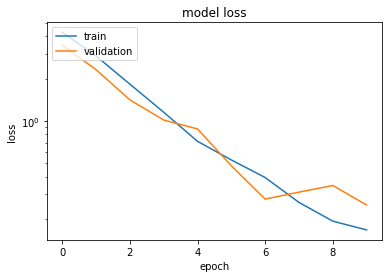

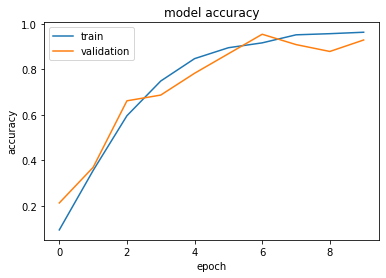

In [ ]:
plot_model_results()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1024)              197632    
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 99)                101475    
                                                                 
Total params: 1,348,707
Trainable params: 1,348,707
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 7m

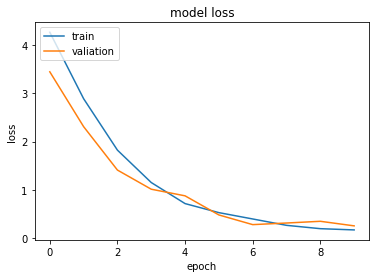

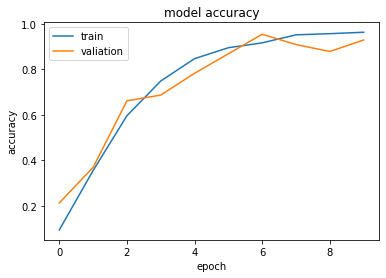

training cases=792, validation cases=198, possible outcomes=99
accuracy=0.90%, balanced_accuracy=0.90%, loss=0.251
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         2
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


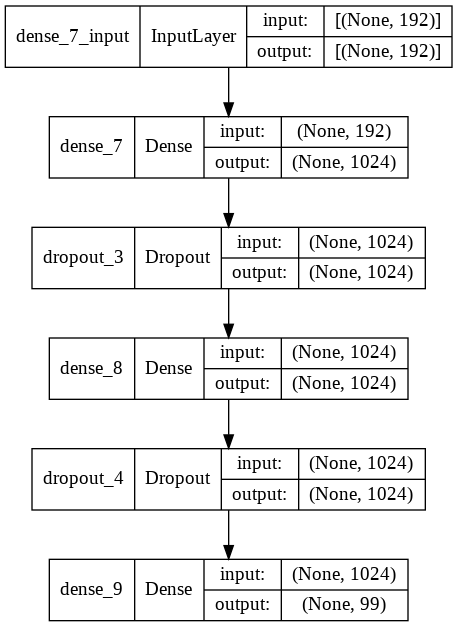

In [ ]:
# Validate
model.summary()
val_loss, val_accuracy = model.evaluate(X_val2, y_val2, batch_size=64, verbose=1)
print(f'validation loss={val_loss}, validation accuracy={val_accuracy}')
plot_model_history('loss')
plot_model_history('accuracy')
model_performance(model, X_raw2, X_val2, y_val2)
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [ ]:
y_predicted = model.predict(X_val2)
y_grand_truth = y_val2
y_predicted = y_predicted.argmax(axis=1)
y_grand_truth = y_grand_truth.argmax(axis=1)

cm = confusion_matrix(y_grand_truth, y_predicted)
#cm

trainaccuracy= accuracy_score(y_grand_truth, y_predicted)
trainaccuracy
print("Validation Data Accuracy:  {}%".format(round((trainaccuracy*100),2)))

print("EVALUATION ON TESTING DATA")
print(classification_report(y_grand_truth, y_predicted))

#print ("Confusion matrix")
#print(confusion_matrix(y_grand_truth, y_predicted))



0.9292929292929293

Validation Data Accuracy:  92.93%
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       0.67      1.00      0.80         2
          15       1.00      1.00      1.00         2
          16       1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Figure 5.1: Simple Multilayer Perceptron

## Convolution1D with SGD

In [10]:
label_encoder = LabelEncoder().fit(train_data.species)
labels = label_encoder.transform(train_data.species)
classes = list(label_encoder.classes_)

nb_features = 64 # number of features per features type (shape, texture, margin)   
nb_class = len(classes)

# reshape train data
X_train_r = np.zeros((len(x_train_features), nb_features, 3))
X_train_r[:, :, 0] = x_train_features[:, :nb_features]
X_train_r[:, :, 1] = x_train_features[:, nb_features:128]
X_train_r[:, :, 2] = x_train_features[:, 128:]

# reshape validation data
X_valid_r = np.zeros((len(x_validation_features), nb_features, 3))
X_valid_r[:, :, 0] = x_validation_features[:, :nb_features]
X_valid_r[:, :, 1] = x_validation_features[:, nb_features:128]
X_valid_r[:, :, 2] = x_validation_features[:, 128:]

### Hyperparameter Tuning

In [43]:

params = {
      'Conv1d_filters':[128,512,768,1024],
      'activation' :["relu",'tanh'], #"selu","linear",
      'dropout': [0.2], #, 0.40],
      'No_of_Units_in_dense_layers':[384,768,1152,2400],
      'pool_size':[(2,2)], #,(4,4)],

      'lr': [0.01], #(0.1, 0.01,1 )
      'epochs': [15],
      'dropout': [0.2], #, 0.40],
      'optimizer': ['rmsprop'], #"Adam","Adagrad","sgd",
      'loss': ['categorical_crossentropy'], #["binary_crossentropy","mean_squared_error","mean_absolute_error",'categorical_crossentropy'],
      'last_activation': ["softmax"], #["sigmoid"],
     
      'decay':[1e-6], #1e-4,1e-2),
      'momentum':[0.9], #,0.5,0.2),

      'padding':["same"] #"valid",
    }

In [44]:
def Randomized_Model(Conv1d_filters = 512, dropout=0.5,optimizer="adam",loss='categorical_crossentropy',
                    last_activation="softmax",activation="relu",decay=1e-6, lr=.01,momentum=.9,
                    No_of_Units_in_dense_layers=1152, padding= 'same',pool_size=(2,2)):
    
    model = Sequential()
    model.add(Convolution1D(Conv1d_filters, 1, input_shape=(nb_features, 3),padding=padding))
    model.add(BatchNormalization())
    #model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dropout(dropout))

    model.add(Dense(No_of_Units_in_dense_layers, activation=activation))
    model.add(Dropout(dropout))
    
    model.add(Dense(No_of_Units_in_dense_layers/3, activation=activation))
    model.add(Dropout(dropout))

    model.add(Dense(99, activation=last_activation))

    if optimizer=="Adam":
        opt=Adam(lr=lr, decay=decay, beta_1=0.9, beta_2=0.999)
    elif optimizer=="Adagrad":
        opt=Adagrad(lr=lr, epsilon=None, decay=decay)
    elif optimizer=="sgd":
        opt=SGD(lr=0.01, nesterov=True, decay=1e-6, momentum=0.9)
    else:
        opt='rmsprop'
    
    model.compile(loss=loss,optimizer=opt, metrics=['accuracy'])

    return model

In [37]:
X_train_r.shape, y_train.shape, X_valid_r.shape, y_validation.shape

((792, 64, 3), (792, 99), (198, 64, 3), (198, 99))

In [ ]:
start=datetime.now()
model = KerasClassifier(build_fn=Randomized_Model, epochs=10, batch_size=20, verbose=1)
grid = RandomizedSearchCV(estimator=model, cv=KFold(3), param_distributions=params, 
                          verbose=20,  n_iter=10, n_jobs=1)
#grid = GridSearchCV(estimator=model, cv=KFold(3), param_grid=params,verbose=20,  n_jobs=-1)
grid_result = grid.fit(X_train_r, y_train)
end=datetime.now()
print(f'\nCNN Fitting - Start Time: {start}')
print(f'CNN Fitting - End Time: {end}')
print(f'CNN - Time to Fit: {end-start}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] pool_size=(2, 2), padding=same, optimizer=rmsprop, momentum=0.9, lr=0.01, loss=categorical_crossentropy, last_activation=softmax, epochs=15, dropout=0.2, decay=1e-06, activation=tanh, No_of_Units_in_dense_layers=768, Conv1d_filters=1024 
Epoch 1/15
27/27 [==============================] - 15s 497ms/step - loss: 3.8005 - accuracy: 0.2008
Epoch 2/15
27/27 [==============================] - 13s 492ms/step - loss: 2.2464 - accuracy: 0.5095
Epoch 3/15
27/27 [==============================] - 13s 492ms/step - loss: 1.5879 - accuracy: 0.6648
Epoch 4/15
27/27 [==============================] - 13s 494ms/step - loss: 1.0944 - accuracy: 0.7652
Epoch 5/15
27/27 [==============================] - 13s 495ms/step - loss: 0.7817 - accuracy: 0.8504
Epoch 6/15
27/27 [==============================] - 13s 495ms/step - loss: 0.5828 - accuracy: 0.9034
Epoch 7/15
27/27 [==============================] - 13s 498ms/step - loss: 0.3989 - accura

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min remaining:    0.0s


Epoch 1/15
27/27 [==============================] - 14s 493ms/step - loss: 3.8285 - accuracy: 0.1856
Epoch 2/15
27/27 [==============================] - 13s 499ms/step - loss: 2.3949 - accuracy: 0.4356
Epoch 3/15
27/27 [==============================] - 13s 494ms/step - loss: 1.7241 - accuracy: 0.6364
Epoch 4/15
27/27 [==============================] - 13s 492ms/step - loss: 1.2415 - accuracy: 0.7443
Epoch 5/15
27/27 [==============================] - 13s 495ms/step - loss: 0.8385 - accuracy: 0.8485
Epoch 6/15
27/27 [==============================] - 13s 496ms/step - loss: 0.6478 - accuracy: 0.8902
Epoch 7/15
27/27 [==============================] - 13s 492ms/step - loss: 0.5519 - accuracy: 0.9072
Epoch 8/15
27/27 [==============================] - 13s 493ms/step - loss: 0.3676 - accuracy: 0.9451
Epoch 9/15
27/27 [==============================] - 13s 493ms/step - loss: 0.2674 - accuracy: 0.9678
Epoch 10/15
27/27 [==============================] - 13s 496ms/step - loss: 0.2285 - accura

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.8min remaining:    0.0s


Epoch 1/15
27/27 [==============================] - 14s 487ms/step - loss: 3.8481 - accuracy: 0.1705
Epoch 2/15
27/27 [==============================] - 13s 488ms/step - loss: 2.2674 - accuracy: 0.4754
Epoch 3/15
27/27 [==============================] - 13s 484ms/step - loss: 1.6006 - accuracy: 0.6269
Epoch 4/15
27/27 [==============================] - 13s 491ms/step - loss: 1.0839 - accuracy: 0.7746
Epoch 5/15
27/27 [==============================] - 13s 488ms/step - loss: 0.7451 - accuracy: 0.8769
Epoch 6/15
27/27 [==============================] - 13s 487ms/step - loss: 0.5659 - accuracy: 0.9072
Epoch 7/15
27/27 [==============================] - 13s 492ms/step - loss: 0.4172 - accuracy: 0.9470
Epoch 8/15
27/27 [==============================] - 13s 486ms/step - loss: 0.2723 - accuracy: 0.9697
Epoch 9/15
27/27 [==============================] - 13s 492ms/step - loss: 0.2307 - accuracy: 0.9621
Epoch 10/15
27/27 [==============================] - 13s 487ms/step - loss: 0.1549 - accura

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 10.2min remaining:    0.0s


Epoch 1/15
27/27 [==============================] - 21s 716ms/step - loss: 17.8666 - accuracy: 0.2462
Epoch 2/15
27/27 [==============================] - 20s 724ms/step - loss: 3.2212 - accuracy: 0.5303
Epoch 3/15
27/27 [==============================] - 25s 928ms/step - loss: 1.5385 - accuracy: 0.7027
Epoch 4/15
27/27 [==============================] - 20s 731ms/step - loss: 0.9354 - accuracy: 0.8049
Epoch 5/15
27/27 [==============================] - 20s 733ms/step - loss: 0.6439 - accuracy: 0.8580
Epoch 6/15
27/27 [==============================] - 20s 739ms/step - loss: 0.4587 - accuracy: 0.8958
Epoch 7/15
27/27 [==============================] - 20s 730ms/step - loss: 0.5137 - accuracy: 0.8939
Epoch 8/15
27/27 [==============================] - 20s 736ms/step - loss: 0.3602 - accuracy: 0.9186
Epoch 9/15
27/27 [==============================] - 20s 735ms/step - loss: 0.2564 - accuracy: 0.9432
Epoch 10/15
27/27 [==============================] - 20s 738ms/step - loss: 0.2911 - accur

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 15.3min remaining:    0.0s


Epoch 1/15
27/27 [==============================] - 21s 731ms/step - loss: 17.8344 - accuracy: 0.2159
Epoch 2/15
27/27 [==============================] - 20s 735ms/step - loss: 3.0475 - accuracy: 0.5777
Epoch 3/15
27/27 [==============================] - 20s 727ms/step - loss: 1.8878 - accuracy: 0.6686
Epoch 4/15
27/27 [==============================] - 20s 730ms/step - loss: 1.0418 - accuracy: 0.7727
Epoch 5/15
27/27 [==============================] - 20s 730ms/step - loss: 1.0075 - accuracy: 0.8125
Epoch 6/15
27/27 [==============================] - 20s 726ms/step - loss: 0.5109 - accuracy: 0.8731
Epoch 7/15
27/27 [==============================] - 20s 744ms/step - loss: 0.4532 - accuracy: 0.8883
Epoch 8/15
27/27 [==============================] - 20s 740ms/step - loss: 0.3965 - accuracy: 0.9242
Epoch 9/15
27/27 [==============================] - 20s 733ms/step - loss: 0.3146 - accuracy: 0.9280
Epoch 10/15
27/27 [==============================] - 20s 740ms/step - loss: 0.3162 - accur

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 20.4min remaining:    0.0s


Epoch 1/15
27/27 [==============================] - 21s 726ms/step - loss: 19.2993 - accuracy: 0.2216
Epoch 2/15
27/27 [==============================] - 20s 728ms/step - loss: 2.8063 - accuracy: 0.5966
Epoch 3/15
27/27 [==============================] - 23s 844ms/step - loss: 1.6713 - accuracy: 0.7159
Epoch 4/15
27/27 [==============================] - 20s 742ms/step - loss: 1.0671 - accuracy: 0.7841
Epoch 5/15
27/27 [==============================] - 20s 737ms/step - loss: 0.6272 - accuracy: 0.8693
Epoch 6/15
27/27 [==============================] - 20s 727ms/step - loss: 0.4867 - accuracy: 0.8864
Epoch 7/15
27/27 [==============================] - 20s 735ms/step - loss: 0.3619 - accuracy: 0.9110
Epoch 8/15
27/27 [==============================] - 20s 733ms/step - loss: 0.3150 - accuracy: 0.9223
Epoch 9/15
27/27 [==============================] - 20s 729ms/step - loss: 0.2991 - accuracy: 0.9413
Epoch 10/15
27/27 [==============================] - 20s 731ms/step - loss: 0.2374 - accur

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 25.4min remaining:    0.0s


Epoch 1/15
27/27 [==============================] - 8s 252ms/step - loss: 4.0142 - accuracy: 0.1364
Epoch 2/15
27/27 [==============================] - 7s 259ms/step - loss: 3.0263 - accuracy: 0.3390
Epoch 3/15
27/27 [==============================] - 7s 259ms/step - loss: 2.4265 - accuracy: 0.5038
Epoch 4/15
27/27 [==============================] - 7s 260ms/step - loss: 2.0366 - accuracy: 0.6042
Epoch 5/15
27/27 [==============================] - 7s 259ms/step - loss: 1.7567 - accuracy: 0.6894
Epoch 6/15
27/27 [==============================] - 7s 257ms/step - loss: 1.4262 - accuracy: 0.7652
Epoch 7/15
27/27 [==============================] - 7s 259ms/step - loss: 1.1926 - accuracy: 0.8352
Epoch 8/15
27/27 [==============================] - 7s 257ms/step - loss: 1.0133 - accuracy: 0.8655
Epoch 9/15
27/27 [==============================] - 7s 259ms/step - loss: 0.8059 - accuracy: 0.9148
Epoch 10/15
27/27 [==============================] - 8s 280ms/step - loss: 0.6658 - accuracy: 0.9318

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 27.8min remaining:    0.0s


Epoch 1/15
27/27 [==============================] - 8s 258ms/step - loss: 4.0450 - accuracy: 0.1326
Epoch 2/15
27/27 [==============================] - 7s 263ms/step - loss: 3.0783 - accuracy: 0.3144
Epoch 3/15
27/27 [==============================] - 7s 257ms/step - loss: 2.5369 - accuracy: 0.4886
Epoch 4/15
27/27 [==============================] - 7s 257ms/step - loss: 2.0851 - accuracy: 0.6136
Epoch 5/15
27/27 [==============================] - 7s 259ms/step - loss: 1.7044 - accuracy: 0.7159
Epoch 6/15
27/27 [==============================] - 7s 255ms/step - loss: 1.4520 - accuracy: 0.7633
Epoch 7/15
27/27 [==============================] - 7s 260ms/step - loss: 1.1848 - accuracy: 0.8447
Epoch 8/15
27/27 [==============================] - 7s 253ms/step - loss: 1.0453 - accuracy: 0.8390
Epoch 9/15
27/27 [==============================] - 7s 258ms/step - loss: 0.8033 - accuracy: 0.9034
Epoch 10/15
27/27 [==============================] - 7s 258ms/step - loss: 0.7111 - accuracy: 0.9356

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 30.2min remaining:    0.0s


Epoch 1/15
27/27 [==============================] - 8s 253ms/step - loss: 4.1817 - accuracy: 0.1004
Epoch 2/15
27/27 [==============================] - 7s 252ms/step - loss: 3.1284 - accuracy: 0.2955
Epoch 3/15
27/27 [==============================] - 7s 255ms/step - loss: 2.4827 - accuracy: 0.4773
Epoch 4/15
27/27 [==============================] - 7s 250ms/step - loss: 2.0649 - accuracy: 0.6288
Epoch 5/15
27/27 [==============================] - 7s 253ms/step - loss: 1.7301 - accuracy: 0.7008
Epoch 6/15
27/27 [==============================] - 7s 249ms/step - loss: 1.4486 - accuracy: 0.7689
Epoch 7/15
27/27 [==============================] - 7s 252ms/step - loss: 1.1321 - accuracy: 0.8277
Epoch 8/15
27/27 [==============================] - 7s 253ms/step - loss: 1.0092 - accuracy: 0.8693
Epoch 9/15
27/27 [==============================] - 7s 249ms/step - loss: 0.8120 - accuracy: 0.9129
Epoch 10/15
27/27 [==============================] - 7s 251ms/step - loss: 0.6620 - accuracy: 0.9413

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 32.6min remaining:    0.0s


Epoch 1/15
27/27 [==============================] - 3s 78ms/step - loss: 5.4504 - accuracy: 0.2330
Epoch 2/15
27/27 [==============================] - 2s 90ms/step - loss: 1.5778 - accuracy: 0.6307
Epoch 3/15
27/27 [==============================] - 4s 160ms/step - loss: 1.0965 - accuracy: 0.7462
Epoch 4/15
27/27 [==============================] - 2s 70ms/step - loss: 0.6551 - accuracy: 0.8220
Epoch 5/15
27/27 [==============================] - 2s 71ms/step - loss: 0.6505 - accuracy: 0.8485
Epoch 6/15
27/27 [==============================] - 2s 69ms/step - loss: 0.4244 - accuracy: 0.9015
Epoch 7/15
27/27 [==============================] - 2s 71ms/step - loss: 0.3049 - accuracy: 0.9318
Epoch 8/15
27/27 [==============================] - 2s 71ms/step - loss: 0.4134 - accuracy: 0.9091
Epoch 9/15
27/27 [==============================] - 2s 71ms/step - loss: 0.4379 - accuracy: 0.9205
Epoch 10/15
27/27 [==============================] - 2s 75ms/step - loss: 0.2392 - accuracy: 0.9527
Epoch 11

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 33.3min remaining:    0.0s


27/27 [==============================] - 3s 73ms/step - loss: 5.3209 - accuracy: 0.2273
Epoch 2/15
27/27 [==============================] - 2s 72ms/step - loss: 1.4684 - accuracy: 0.6648
Epoch 3/15
27/27 [==============================] - 2s 72ms/step - loss: 1.0215 - accuracy: 0.7633
Epoch 4/15
27/27 [==============================] - 2s 73ms/step - loss: 0.6711 - accuracy: 0.8258
Epoch 5/15
27/27 [==============================] - 2s 71ms/step - loss: 0.5475 - accuracy: 0.8617
Epoch 6/15
27/27 [==============================] - 2s 69ms/step - loss: 0.3350 - accuracy: 0.9261
Epoch 7/15
27/27 [==============================] - 2s 75ms/step - loss: 0.4708 - accuracy: 0.8977
Epoch 8/15
27/27 [==============================] - 2s 73ms/step - loss: 0.4059 - accuracy: 0.9110
Epoch 9/15
27/27 [==============================] - 2s 72ms/step - loss: 0.1642 - accuracy: 0.9602
Epoch 10/15
27/27 [==============================] - 2s 71ms/step - loss: 0.3187 - accuracy: 0.9318
Epoch 11/15
27/27 [=

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed: 33.8min remaining:    0.0s


27/27 [==============================] - 3s 74ms/step - loss: 5.8691 - accuracy: 0.2102
Epoch 2/15
27/27 [==============================] - 2s 74ms/step - loss: 2.1631 - accuracy: 0.5492
Epoch 3/15
27/27 [==============================] - 2s 74ms/step - loss: 1.1092 - accuracy: 0.7348
Epoch 4/15
27/27 [==============================] - 2s 73ms/step - loss: 0.6160 - accuracy: 0.8314
Epoch 5/15
27/27 [==============================] - 2s 72ms/step - loss: 0.4746 - accuracy: 0.8902
Epoch 6/15
27/27 [==============================] - 2s 73ms/step - loss: 0.4913 - accuracy: 0.8958
Epoch 7/15
27/27 [==============================] - 2s 74ms/step - loss: 0.5122 - accuracy: 0.8883
Epoch 8/15
27/27 [==============================] - 2s 74ms/step - loss: 0.3095 - accuracy: 0.9299
Epoch 9/15
27/27 [==============================] - 2s 75ms/step - loss: 0.3063 - accuracy: 0.9394
Epoch 10/15
27/27 [==============================] - 2s 73ms/step - loss: 0.2294 - accuracy: 0.9545
Epoch 11/15
27/27 [=

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 34.5min remaining:    0.0s


Epoch 1/15
27/27 [==============================] - 7s 217ms/step - loss: 8.1896 - accuracy: 0.2992
Epoch 2/15
27/27 [==============================] - 6s 210ms/step - loss: 2.0859 - accuracy: 0.6193
Epoch 3/15
27/27 [==============================] - 6s 212ms/step - loss: 1.2237 - accuracy: 0.7973
Epoch 4/15
27/27 [==============================] - 6s 211ms/step - loss: 1.1192 - accuracy: 0.8220
Epoch 5/15
27/27 [==============================] - 6s 209ms/step - loss: 0.8698 - accuracy: 0.8731
Epoch 6/15
27/27 [==============================] - 6s 211ms/step - loss: 0.8152 - accuracy: 0.8902
Epoch 7/15
27/27 [==============================] - 6s 213ms/step - loss: 0.4704 - accuracy: 0.9356
Epoch 8/15
27/27 [==============================] - 6s 206ms/step - loss: 0.5763 - accuracy: 0.9091
Epoch 9/15
27/27 [==============================] - 6s 206ms/step - loss: 0.5519 - accuracy: 0.9432
Epoch 10/15
27/27 [==============================] - 6s 210ms/step - loss: 0.3503 - accuracy: 0.9621

In [ ]:
best_params=grid_result.best_params_
best_params

In [ ]:
start=datetime.now()

nb_epoch = 50
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train_r, y_train, epochs=nb_epoch, validation_data=(X_valid_r, y_validation), batch_size=16,callbacks=[early_stopping])

end=datetime.now()
print(f'\nKeras Fitting - Start Time: {start}')
print(f'Keras Fitting - End Time: {end}')
print(f'kKeras - Time to Fit: {end-start}')

In [ ]:
# Keras model with one Convolution1D layer
# unfortunately more number of covnolutional layers, filters and filters lenght 
# don't give better accuracy
model = Sequential()
model.add(Convolution1D(512, 1, input_shape=(nb_features, 3)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(768, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(nb_class))
model.add(Activation('softmax'))

In [ ]:
#y_train = np_utils.to_categorical(y_train, nb_class)
#y_validation = np_utils.to_categorical(y_validation, nb_class)

sgd = SGD(lr=0.01, nesterov=True, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
X_train_r.shape, y_train.shape, X_valid_r.shape, y_validation.shape

((792, 64, 3), (792, 99), (198, 64, 3), (198, 99))

In [ ]:
start=datetime.now()

nb_epoch = 50
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train_r, y_train, epochs=nb_epoch, validation_data=(X_valid_r, y_validation), batch_size=16,callbacks=[early_stopping])

end=datetime.now()
print(f'\nKeras Fitting - Start Time: {start}')
print(f'Keras Fitting - End Time: {end}')
print(f'kKeras - Time to Fit: {end-start}')

Epoch 1/50
50/50 [==============================] - 10s 188ms/step - loss: 4.5936 - accuracy: 0.0152 - val_loss: 4.5709 - val_accuracy: 0.0455
Epoch 2/50
50/50 [==============================] - 9s 182ms/step - loss: 4.5547 - accuracy: 0.0354 - val_loss: 4.4962 - val_accuracy: 0.0556
Epoch 3/50
50/50 [==============================] - 9s 182ms/step - loss: 4.4193 - accuracy: 0.0518 - val_loss: 4.2294 - val_accuracy: 0.1010
Epoch 4/50
50/50 [==============================] - 9s 180ms/step - loss: 4.0121 - accuracy: 0.0682 - val_loss: 3.5270 - val_accuracy: 0.1566
Epoch 5/50
50/50 [==============================] - 11s 212ms/step - loss: 3.1418 - accuracy: 0.1995 - val_loss: 2.4536 - val_accuracy: 0.3131
Epoch 6/50
50/50 [==============================] - 9s 181ms/step - loss: 2.0446 - accuracy: 0.4091 - val_loss: 1.5183 - val_accuracy: 0.5505
Epoch 7/50
50/50 [==============================] - 9s 180ms/step - loss: 1.1903 - accuracy: 0.6515 - val_loss: 1.1208 - val_accuracy: 0.6414
Epoc

val_acc:  0.9898989796638489
val_loss:  0.054003238677978516
train_acc:  1.0
train_loss:  0.001012608758173883

train/val loss ratio:  0.018750889445947348


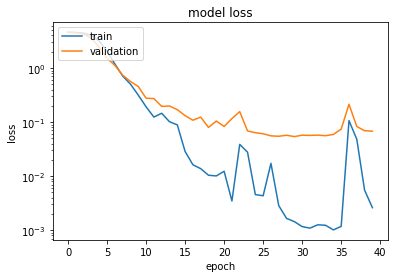

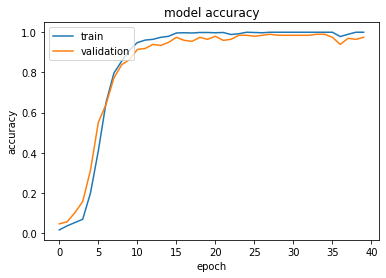

In [ ]:
plot_model_results()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 64, 512)           2048      
                                                                 
 activation (Activation)     (None, 64, 512)           0         
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 768)               25166592  
                                                                 
 dense_1 (Dense)             (None, 256)               196864    
                                                                 
 dense_2 (Dense)             (None, 128)               3

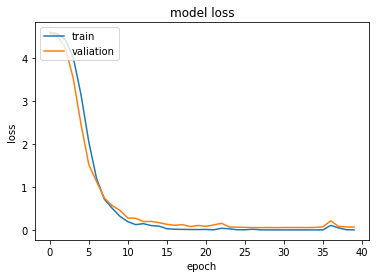

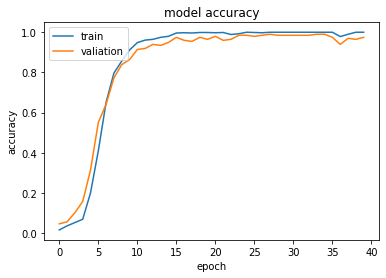

training cases=792, validation cases=198, possible outcomes=99
accuracy=0.97%, balanced_accuracy=0.97%, loss=0.068
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1

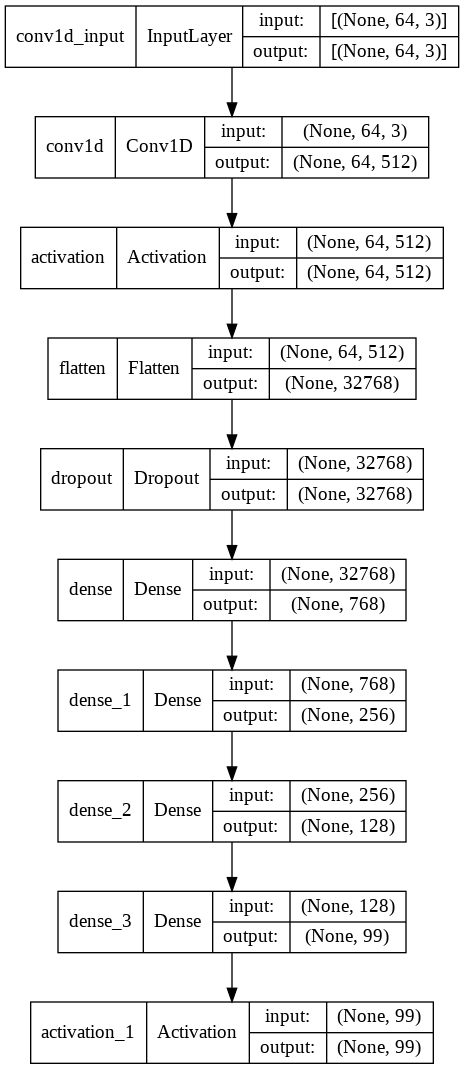

In [ ]:
# Validate
model.summary()
val_loss, val_accuracy = model.evaluate(X_valid_r, y_validation, batch_size=64, verbose=1)
print(f'validation loss={val_loss}, validation accuracy={val_accuracy}')
plot_model_history('loss')
plot_model_history('accuracy')
model_performance(model, X_train_r, X_valid_r, y_validation)
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

Figure 5.2: Convolution1D with optimizer SGD

## MLP with early_stopping

In [16]:
# define model
#ml_model = mlp
#X_raw2, X_val2, X_test2 = reshape_combined(x_train_images, x_train_features, ml_model.__name__), reshape_combined(x_validation_images, x_validation_features, ml_model.__name__), reshape_combined(test_images, test_data, ml_model.__name__)
X_raw2, X_val2, X_test2 = x_train_features.reshape(x_train_features.shape[0], -1), x_validation_features.reshape(x_validation_features.shape[0], -1), x_test.reshape(x_test.shape[0], -1)
#X_raw2, X_val2, X_test2 = reshape(x_train_images,  ml_model.__name__), reshape(x_validation_images, ml_model.__name__), reshape(test_images, ml_model.__name__)
y_raw2, y_val2 = y_train, y_validation
X_raw2.shape, y_raw2.shape, X_val2.shape, y_val2.shape
#X_raw2[:10]

((792, 192), (792, 99), (198, 192), (198, 99))

In [ ]:
## Developing a layered model for Neural Networks
## Input dimensions should be equal to the number of features
## We used softmax layer to predict a uniform probabilistic distribution of outcomes
## https://keras.io/initializations/ ;glorot_uniform, glorot_normal, lecun_uniform, orthogonal,he_normal

model = Sequential()
model.add(Dense(768,input_shape=(X_raw2.shape[1],), kernel_initializer='glorot_normal', activation='tanh'))
model.add(Dropout(0.4))

model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.4))

model.add(Dense(99, activation='softmax'))

## Error is measured as categorical crossentropy or multiclass logloss
## Adagrad, rmsprop, SGD, Adadelta, Adam, Adamax, Nadam

model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics = ["accuracy"])

In [ ]:
start=datetime.now()

## Fitting the model on the whole training data with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=300)

history = model.fit(X_raw2, y_raw2,batch_size=192,epochs=2500 ,verbose=0,
                    validation_data=(X_val2, y_val2),callbacks=[early_stopping])
end=datetime.now()
print(f'\nKeras Fitting - Start Time: {start}')
print(f'Keras Fitting - End Time: {end}')
print(f'kKeras - Time to Fit: {end-start}')



Keras Fitting - Start Time: 2021-11-13 01:15:22.259573
Keras Fitting - End Time: 2021-11-13 01:16:41.181444
kKeras - Time to Fit: 0:01:18.921871


val_acc:  1.0
val_loss:  0.0029469546861946583
train_acc:  1.0
train_loss:  1.1484415551876737e-07

train/val loss ratio:  3.897045178765991e-05


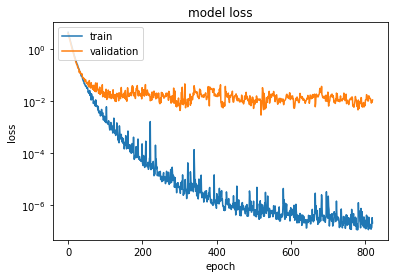

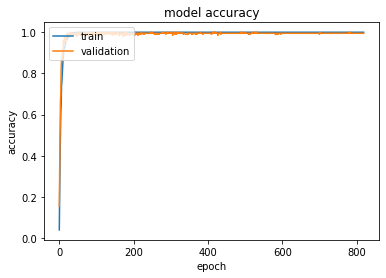

In [ ]:
plot_model_results()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 768)               148224    
                                                                 
 dropout_1 (Dropout)         (None, 768)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               196864    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 99)                25443     
                                                                 
Total params: 370,531
Trainable params: 370,531
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 5ms/st

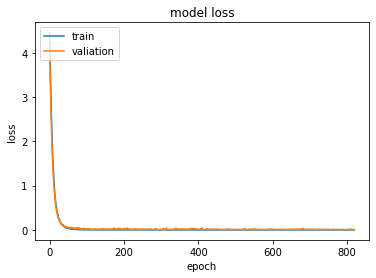

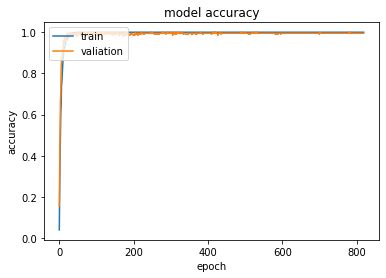

training cases=792, validation cases=198, possible outcomes=99
accuracy=0.99%, balanced_accuracy=0.99%, loss=0.011
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1

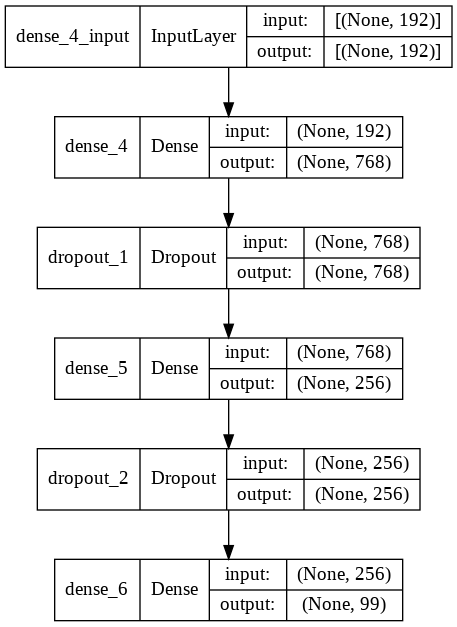

In [ ]:
# Validate
model.summary()
val_loss, val_accuracy = model.evaluate(X_val2, y_val2, batch_size=64, verbose=1)
print(f'validation loss={val_loss}, validation accuracy={val_accuracy}')
plot_model_history('loss')
plot_model_history('accuracy')
model_performance(model, X_raw2, X_val2, y_val2)
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

Figure 5.3: Multilayer Perceptron with an Early Stopping

### Hyperparameter Tuning

In [61]:
'''
params = {'lr': (0.1, 0.01,1 ),
     'epochs': [10,5,15],
     'dropout': (0, 0.40, 0.8),
     'optimizer': ["Adam","Adagrad","sgd",'rmsprop'],
     'loss': ["binary_crossentropy","mean_squared_error","mean_absolute_error",'categorical_crossentropy'],
     'last_activation': ["softmax","sigmoid"],
     'activation' :["relu","selu","linear",'tanh'],
     'clipnorm':(0.0,0.5,1),
     'decay':(1e-6,1e-4,1e-2),
     'momentum':(0.9,0.5,0.2),
     'l1': (0.01,0.001,0.0001),
     'l2': (0.01,0.001,0.0001),
     'No_of_CONV_and_Maxpool_layers':[2,3],
     'No_of_Dense_Layers': [2,3,4],
     'No_of_Units_in_dense_layers':[128,64,32,256],
     'Kernal_Size':[(2,2),(4,4),(6,6)],
     'Conv2d_filters':[60,40,80,120],
     'pool_size':[(2,2),(4,4)],
     'padding':["valid","same"]
    }

params = {'lr': (0.1, 0.01,1,0.001 ),
     'epochs': [10,5,15,30],
     'dropout': (0,0.2, 0.40, 0.8),
     'optimizer': ["Adam","Adagrad","sgd",'rmsprop'],
     'loss': ['categorical_crossentropy',"binary_crossentropy","mean_squared_error","mean_absolute_error"],
     'last_activation': ["softmax","sigmoid"],
     'activation' :["relu","selu","linear",'tanh'],
     'clipnorm':(0.0,0.5,1),
     'decay':(1e-6,1e-4,1e-2),
     'momentum':(0.9,0.5,0.2),
     'l1': (0.01,0.001,0.0001),
     'l2': (0.01,0.001,0.0001),
     'No_of_CONV_and_Maxpool_layers':[2,3],
     'No_of_Dense_Layers': [2,3,4,5],
     'No_of_Units_in_dense_layers':[768,512,256,128],
     
     'Conv1d_filters':[60,40,80,120]
     
     
    }

def Randomized_Model(lr=0.01,dropout=0.5,optimizer="adam",loss='mean_squared_error',
                    last_activation="softmax",activation="relu",clipnorm=0.1,
                    decay=1e-2,momentum=0.5,l1=0.01,l2=0.001,No_of_CONV_and_Maxpool_layers=3,
                    No_of_Dense_Layers=3,No_of_Units_in_dense_layers=24,Conv1d_filters=60):
       
    
    
    #model sequential
    model=Sequential()

    #model.add(Dense(768,input_shape=(X_train_r.shape[1],), kernel_initializer='glorot_normal', activation='tanh'))
    #model.add(Dropout(0.4))

    #model.add(Dense(256, activation='tanh'))
    #model.add(Dropout(0.4))


    for i in range(0,No_of_CONV_and_Maxpool_layers):
        model.add(Convolution1D(Conv1d_filters, 1, input_shape=(nb_features, 3)))
        #model.add(Conv2D(Conv2d_filters, (2,2) ,padding="same"))
        model.add(Activation(activation))
        #model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    
    model.add(Flatten())

    for i in range(0,No_of_Dense_Layers):
        model.add(Dense(units=No_of_Units_in_dense_layers,activation=activation, kernel_regularizer=regularizers.l2(l2),
                  activity_regularizer=regularizers.l1(l1)))   
        model.add(Dropout(dropout))
    #model.add(Dense(units=20,activation=activation))
    
    #model.add(Dense(units=2,activation=activation))
    if optimizer=="Adam":
        opt=keras.optimizers.Adam(lr=lr, decay=decay, beta_1=0.9, beta_2=0.999)
    elif optimizer=="Adagrad":
        opt=keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=decay)
    elif optimizer=="sgd":
        opt=keras.optimizers.SGD(lr=lr, momentum=momentum, decay=decay, nesterov=False)
    else:
        opt='rmsprop'

    model.add(Dense(nb_class))
    model.add(Activation('softmax'))
    model.compile(loss=loss,optimizer=opt,
                 metrics=['accuracy'])
    
    

    return model
'''

'\nparams = {\'lr\': (0.1, 0.01,1 ),\n     \'epochs\': [10,5,15],\n     \'dropout\': (0, 0.40, 0.8),\n     \'optimizer\': ["Adam","Adagrad","sgd",\'rmsprop\'],\n     \'loss\': ["binary_crossentropy","mean_squared_error","mean_absolute_error",\'categorical_crossentropy\'],\n     \'last_activation\': ["softmax","sigmoid"],\n     \'activation\' :["relu","selu","linear",\'tanh\'],\n     \'clipnorm\':(0.0,0.5,1),\n     \'decay\':(1e-6,1e-4,1e-2),\n     \'momentum\':(0.9,0.5,0.2),\n     \'l1\': (0.01,0.001,0.0001),\n     \'l2\': (0.01,0.001,0.0001),\n     \'No_of_CONV_and_Maxpool_layers\':[2,3],\n     \'No_of_Dense_Layers\': [2,3,4],\n     \'No_of_Units_in_dense_layers\':[128,64,32,256],\n     \'Kernal_Size\':[(2,2),(4,4),(6,6)],\n     \'Conv2d_filters\':[60,40,80,120],\n     \'pool_size\':[(2,2),(4,4)],\n     \'padding\':["valid","same"]\n    }\n'

In [72]:
params = {
    'No_of_Units_in_dense_layers': [384,576,768,960,1152,2400], #[576,512,320],
    'kernel_initializer': ['glorot_normal'],#['normal','random_normal','glorot_uniform','he_normal'],
    'epochs': [30], #[10,5,15,30],
    'dropout': [0.40], #(0,0.2, 0.8),
    'optimizer': ['rmsprop'], #["Adam","Adagrad","sgd"]
    'loss': ['categorical_crossentropy'], #["binary_crossentropy","mean_squared_error"], #,"mean_absolute_error"],
    'last_activation': ["softmax"], #["sigmoid"],
    'activation' :["relu",'tanh'] #"linear","selu"
    }

In [73]:
def Randomized_Model(kernel_initializer='glorot_normal',dropout=0.5,optimizer="adam",loss='mean_squared_error',
                    last_activation="softmax",activation="relu",
                    No_of_Units_in_dense_layers=2048):
    
    model = Sequential()
    model.add(Dense(No_of_Units_in_dense_layers,input_dim=192,  kernel_initializer=kernel_initializer, activation=activation))
    model.add(Dropout(dropout))

    model.add(Dense(No_of_Units_in_dense_layers/3, activation=activation))
    model.add(Dropout(dropout))

    model.add(Dense(99, activation=last_activation))

    model.compile(loss=loss,optimizer=optimizer, metrics = ["accuracy"])

    return model

In [74]:
X_raw2, X_val2, X_test2 = x_train_features.reshape(x_train_features.shape[0], -1), x_validation_features.reshape(x_validation_features.shape[0], -1), x_test.reshape(x_test.shape[0], -1)
y_raw2, y_val2 = y_train, y_validation
X_raw2.shape, y_raw2.shape, X_val2.shape, y_val2.shape


((792, 192), (792, 99), (198, 192), (198, 99))

In [75]:
model = KerasClassifier(build_fn=Randomized_Model, epochs=30, batch_size=20, verbose=1)
#grid = RandomizedSearchCV(estimator=model, cv=KFold(3), param_distributions=params, 
#                          verbose=20,  n_iter=10, n_jobs=1)
grid = GridSearchCV(estimator=model, cv=KFold(3), param_grid=params,verbose=20,  n_jobs=-1)
grid_result = grid.fit(X_raw2, y_raw2)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   37.9s
[Parallel(n_job

Epoch 1/30
40/40 [==============================] - 1s 9ms/step - loss: 3.9868 - accuracy: 0.1553
Epoch 2/30
40/40 [==============================] - 0s 9ms/step - loss: 2.3979 - accuracy: 0.5354
Epoch 3/30
40/40 [==============================] - 0s 9ms/step - loss: 1.4303 - accuracy: 0.7879
Epoch 4/30
40/40 [==============================] - 0s 8ms/step - loss: 0.8644 - accuracy: 0.8838
Epoch 5/30
40/40 [==============================] - 0s 9ms/step - loss: 0.5158 - accuracy: 0.9331
Epoch 6/30
40/40 [==============================] - 0s 8ms/step - loss: 0.3583 - accuracy: 0.9508
Epoch 7/30
40/40 [==============================] - 0s 8ms/step - loss: 0.2248 - accuracy: 0.9773
Epoch 8/30
40/40 [==============================] - 0s 8ms/step - loss: 0.1622 - accuracy: 0.9760
Epoch 9/30
40/40 [==============================] - 0s 8ms/step - loss: 0.1200 - accuracy: 0.9886
Epoch 10/30
40/40 [==============================] - 0s 8ms/step - loss: 0.0828 - accuracy: 0.9949
Epoch 11/30
40/40 [

In [76]:
best_params=grid_result.best_params_
best_params

{'No_of_Units_in_dense_layers': 1152,
 'activation': 'tanh',
 'dropout': 0.4,
 'epochs': 30,
 'kernel_initializer': 'glorot_normal',
 'last_activation': 'softmax',
 'loss': 'categorical_crossentropy',
 'optimizer': 'rmsprop'}

In [80]:

model = Sequential()
model.add(Dense(786,input_shape=(X_raw2.shape[1],), kernel_initializer='glorot_normal', activation='tanh'))
model.add(Dropout(0.4))

model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.4))

model.add(Dense(99, activation='softmax'))

## Error is measured as categorical crossentropy or multiclass logloss
## Adagrad, rmsprop, SGD, Adadelta, Adam, Adamax, Nadam

model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics = ["accuracy"])


In [81]:
start=datetime.now()

## Fitting the model on the whole training data with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=300)

history = model.fit(X_raw2, y_raw2,batch_size=192,epochs=2500 ,verbose=0,validation_data=(X_val2, y_val2),callbacks=[early_stopping])
end=datetime.now()
print(f'\nKeras Fitting - Start Time: {start}')
print(f'Keras Fitting - End Time: {end}')
print(f'kKeras - Time to Fit: {end-start}')



Keras Fitting - Start Time: 2021-11-13 22:10:52.542857
Keras Fitting - End Time: 2021-11-13 22:12:01.702808
kKeras - Time to Fit: 0:01:09.159951


val_acc:  1.0
val_loss:  0.0053375400602817535
train_acc:  1.0
train_loss:  7.194696394208222e-08

train/val loss ratio:  1.3479423691348247e-05


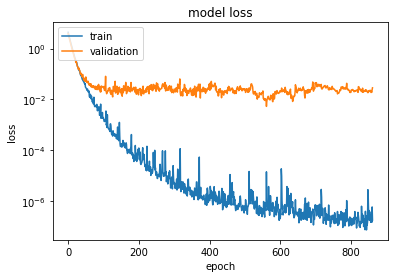

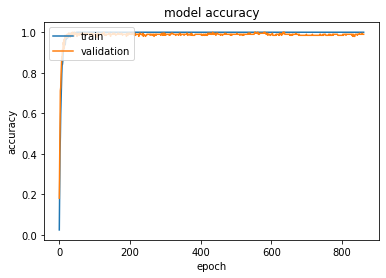

In [82]:
plot_model_results()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_123 (Dense)           (None, 786)               151698    
                                                                 
 dropout_82 (Dropout)        (None, 786)               0         
                                                                 
 dense_124 (Dense)           (None, 256)               201472    
                                                                 
 dropout_83 (Dropout)        (None, 256)               0         
                                                                 
 dense_125 (Dense)           (None, 99)                25443     
                                                                 
Total params: 378,613
Trainable params: 378,613
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 6ms/s

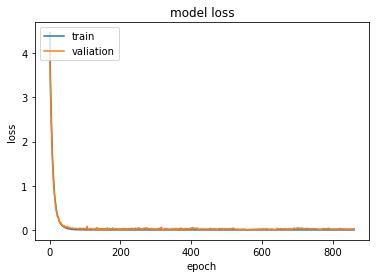

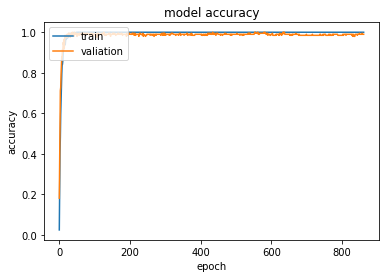

training cases=792, validation cases=198, possible outcomes=99
accuracy=0.99%, balanced_accuracy=0.99%, loss=0.029
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1

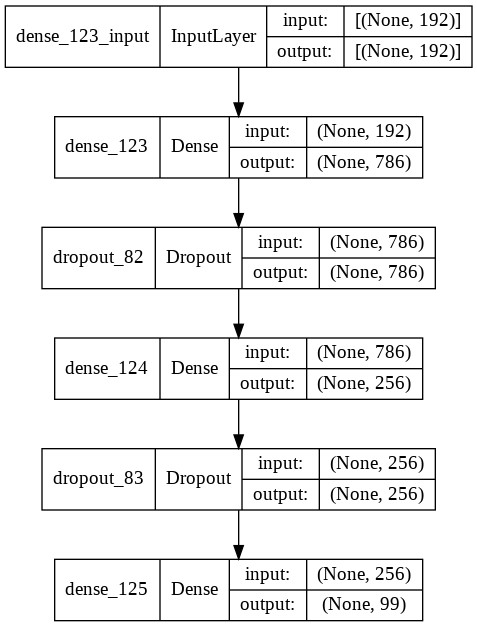

In [83]:
# Validate
model.summary()
val_loss, val_accuracy = model.evaluate(X_val2, y_val2, batch_size=64, verbose=1)
print(f'validation loss={val_loss}, validation accuracy={val_accuracy}')
plot_model_history('loss')
plot_model_history('accuracy')
model_performance(model, X_raw2, X_val2, y_val2)
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)